# Nettoyage Pojet 3 : Concevez une application au service de la santé publique

### Table des matières

* [Découverte du jeu de données](#chapter1)
    * [Trouver les définitions des variables](#section_1_1)
    * [Trouver en // une idée d'application](#section_1_2)
    * [Filtrer le jeu de données](#section_1_2)

* [Traiter les valeurs manquantes](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
    
* [Traiter les valeurs abérentes](#chapter3)
    * [Section 2.1](#section_3_1)
    * [Section 2.2](#section_3_2)

### Chapitre 1 Découverte du jeu de données <a class="anchor" id="chapter1"></a>

Le jeu de données est disponible à l'adresse suivante : 
https://world.openfoodfacts.org/

Lecture du jeu de données

In [1]:
import pandas as pd
import numpy as np

path = 'en.openfoodfacts.org.products.csv'

data = pd.read_csv(path,  sep='\t')

c:\users\pouru\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,8,13,19,20,21,27,28,29,31,32,40,41,42,52,55,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('Le set de données Open Food Facts est composé de ' + str(len(data)) + ' produits et de ' +
      str(data.shape[1]) + ' colonnes')

Le set de données Open Food Facts est composé de 2026078 produits et de 187 colonnes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026078 entries, 0 to 2026077
Columns: 187 entries, code to carnitine_100g
dtypes: float64(125), int64(2), object(60)
memory usage: 2.8+ GB


#### Section 1.1 Définitions des variables et visualisation   <a class="anchor" id="section_1_1"></a>

##### Définitions

Les définitions des variables sont disponibles à l'adresse suivante : https://world.openfoodfacts.org/data/data-fields.txt 

Ce doccument est très utile car il donne le nom et la définition des colonnes. Dans notre cas il y a 187 colonnes donc cella nous évite de faire une exploration "à la main" des différentes catégories.  
Nous avons par exemple : 
- Les pays où l'article est vendu : countries
- la catégorie du produit : categories
- La valeur énergétique des produits : serving_size
- les aditifs : additives
- La composition des produits : Colonnes qui finissent par _100g (multiples compositions des produits)

In [5]:
columns = list(data.columns)
print(list(data.columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_fr

In [6]:
nb_composition_produit = 0
for column in columns:
    if "_100g" in column:
        nb_composition_produit += 1
print(f'Le nombre de colonnes relatives à la composition des produit est : {nb_composition_produit}')

Le nombre de colonnes relatives à la composition des produit est : 112


#### Section 1.2 Trouver une idée d'application<a class="anchor" id="section_1_2"></a>

Nous décidons de construire une application permettant de prévenir les carences en calcium des consomateurs Français.  

Le calcium est essentiel pour maintenir des os solides, pour le bon fonctionnement des muscles et du système sanguin, ainsi que pour limiter un stockage excessif des lipides dans le tissu adipeux. En cas de manque, les os peuvent se fragiliser jusqu’à développer une ostéoporose, une maladie handicapante et fréquente qui touche près de 39% des femmes de 65 ans en France. 

La cause de la carences en Calcium est multiple :
- Une alimentation peu équilibrée
- L'intolérence au lactose
- Le régime Vegan
- Une carence en vitamine D.

Carence en vitamine D : 
L’organisme a besoin d’associer la vitamine D au calcium afin de bien intégrer ce dernier. Si vous manquez d’un de ces nutriments, l’autre risque d’être également à des niveaux très bas. Si un supplément en calcium vous a été prescrit, vous pouvez d’ailleurs demander qu’il soit couplé à un supplément de vitamine D pour une meilleure absorption.

Nous pourons éguiller les consomateurs sur 2 axes : 
- Les produit à haute teuneur en Calcium
- Les produit à haute teneur en vitamine D  
Afin de ne pas creer d'autres problèmes en voulant répondre à ces critères nous chercherons à mettre en avant les produits les plus saint possible.


#### Section 1.3 Filtrer le jeu de données <a class="anchor" id="section_1_3"></a>

##### Selection du pays : France

Notre application se destine à la population française, vérifions si la France est bien représentée dans le jeu de données : 

In [7]:
len(data['countries'].unique())

10893

In [8]:
pays_liste = list(data['countries'].unique())
pays_liste

['en:france',
 'Spain',
 'France',
 'Espagne',
 'en:es',
 'en:United States',
 'en:France',
 'en:fr',
 'United States',
 'Irlande',
 'en:FR',
 nan,
 'en:be',
 'United Kingdom',
 'États-Unis, en:france',
 'France, United States',
 'France,États-Unis',
 'España',
 'en:Ivory Coast',
 'Canada',
 'Suisse',
 'en:it',
 'Germany',
 'France,Belgique',
 'Belgium',
 'France, États-Unis',
 'Pérou',
 'en:germany',
 'en:united-kingdom',
 'Schweiz',
 'Oman',
 'Deutschland',
 'Slovenia',
 'en:DE',
 'en:de',
 'Frankreich, Deutschland',
 'France,Germany,Netherlands',
 'en:KW',
 'ફ્રાન્સ',
 'en:spain',
 'en:ae',
 'en:United Kingdom',
 'France,Switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'Italy',
 'Romania',
 'en:US',
 'Australia',
 'en:Norway',
 'en:ch',
 'us',
 'en:us',
 'en:lu',
 'en:Spain',
 'en:United Arab Emirates',
 'en:Italy',
 'Portugal',
 'en:Mexico',
 'en:Dominican Republic',
 'en:RE',
 'en:Ireland',
 'en:gb',
 'en:Canada',
 'United Kingdom,en:united-kingdom',
 'Israel',
 'en:CH',
 'e

Parfois plusieurs pays sont disponibles pour un même produit.  
La france peut s'écrire de différentes manières

In [9]:
for pays in pays_liste:
    try: 
        if ('fr' in pays) or ('Fr' in pays):
            print(pays)
    except:
        pass

en:france
France
en:France
en:fr
États-Unis, en:france
France, United States
France,États-Unis
France,Belgique
France, États-Unis
Frankreich, Deutschland
France,Germany,Netherlands
France,Switzerland
Frankreich, en:de
France, en:de
Belgique,France
france
Frankreich,Deutschland
France, United Kingdom
France, Royaume-Uni
France,United Kingdom
Belgique, France, Pays-Bas, Royaume-Uni
Frankreich
en:us, en:france
France,Royaume-Uni
France,France
en:fr, United States
France, en:india
France, UK
Frankreich,Spanien,en:at
Frankreich, en:at
Francia
Royaume-Uni, en:france
France,Czech Republic
France,Spain
Francia,España
en:france, United States
France,United States
United States, France
Frankreich, Deutschland, en:at
Australia,France
France,Switzerland,United States
Australia, en:france
Frankrijk,Verenigd Koninkrijk
United States, en:france
Francia,España,Estados Unidos
France,Thailand
Irlande, en:fr
Gabon, en:fr
Canada, France
France,États-Unis,en:france
France, La Réunion
France,United States, 

Belgique,France,France
België,Frankrijk,en:netherlands
Belgique,France,Espagne,en:switzerland
France, Pays-Bas, Belgique
Belgium,France,Luxembourg,en:belgium
Belgien, Frankreich, en:lu
France,Pologne,Belgique
France, Hongrie, Belgique
België,Frankrijk,Hongarije
France,Espagne,Belgique
Belgique,France,Luxembourg
Belgium,France,Luxembourg
België,Frankrijk,Nederland,en:netherlands
Belgique,France,Espagne,Allemagne
Belgium,France,en:belgium
Francia, en:us
France, en:ua
Luxembourg,en:france
França,Alemanya,Espanya
Frankreich,Spanien,en:germany
Tschechien,Frankreich,en:germany
Egypt,France,Jordan,Kuwait,Saudi Arabia,United Arab Emirates,United Kingdom,United States
France, Pologne
France,Japon,Suisse
France,Luxembourg,Algérie
Denmark,France
France, en:martinique
France,México
France, Portugal, Switzerland
République du Congo, en:france
Belgique, Brésil, Canada, France, Suisse
France, Japon, Suisse
Belgique,France,Italie,Maroc,Suisse,Royaume-Uni
France,Germany,Switzerland, en:mexico
Argelia,B

Bélgica,Francia,España,Suiza,Reino Unido
Union européenne France
Espagne,France,belgique
en:GP, en:france
France,République du Congo
Arménie,Belgique,Bulgarie,France,Kurdistan irakien,Luxembourg,Martinique,Pologne,Espagne
Arménie, Bulgarie, France, Kurdistan irakien, Luxembourg, Pologne, Espagne
Arménie, Belgique, Bulgarie, France, Kurdistan irakien, Luxembourg, Espagne
Algeria,Bulgaria,France
Autriche,France,Allemagne,Espagne
Austria,Dinamarca,Francia,Alemania,Países Bajos,España,Suiza
Austria,Francia,Alemania,Países Bajos,España,Suiza
Francia,Singapur,España
bg, France
França,Espanya,en:andorra
Bulgaria,France
Bulgaria,France,en:bulgaria
France, en:bulgaria
България,Франция,en:france
Bulgarie, France
Deutschland,en:Frankreich
Csehország,Franciaország,Magyarország,Szerbia
France,Serbie
Francia,Serbia,España
Franța,Grecia,Ungaria,România
Frankreich,Niederlande
Franța,România,en:romania
Bulgarie,France
Hrvatska,Francuska,Slovenija
France, Slovénie
France,Italy,Slovenia
Francija, en:En, 

Albania, France
France,République de Macédoine
France,Republic of Macedonia
en:be,fr
Australien,Frankreich
France,Malta,Italy
France,Ireland,United States
Belgio,Francia
Frankreich,Belgien
Jordan, France
Belgium,France,Serbia
Belgique, France, Hongrie
Belgium,France,United States
Belgique, Union européenne, France
Belgique, Luxembourg, en:france
Belgique, Suède, en:france
Bélgica, França, Luxemburgo
Belgio, Francia
Bélgica,França
Belgique,en:fr
Belgique, France, en:en
Belgia, Franța, România
Belgien, Frankreich, Deutschland
Belgique,France,Serbie
Belgium,Luxembourg, en:france
Belgium, France, en:us
Belgie,Česko,Francie
Belgique, France, Roumanie
Belgien,Frankreich,en:es
België,Volksrepubliek China,Frankrijk
Belgien, China, Frankreich, en:es
France, fr:Belgique
Frankreich, en:es, en:belgium
France,fr:Belgique
Belgique, Guadeloupe, en:france
en:fr,en:belgium
Union européenne,France,Pays-Bas
France, Irlande, Switzerland
France, en:belgium, en:french-polynesia
Belgium,France,Singapore
Fran

Austria,en:Deutschland,en:Frankreich,en:Italien
Poland, France
en:Ireland, France
Italien, fr:Francia, Germany
Frankreich,Italien,en:italy
Estonia, France
France,Germany, en:switzerland
Belgique, France, Hongrie, Switzerland
Frankreich,Portugal,Spanien,en:austria
Autriche,Belgique,France,Allemagne,Pays-Bas,Suisse
Austria,Belgium,France,Germany,Guadeloupe,Italy,Spain,Sweden,Switzerland,en:singapore
Belgium,Netherlands,France
Austria,Francia,Alemania,Italia,Suiza
België,Frankrijk,Italië
en:france,en:italy
France, Italie, en:belgium
France, en:australia, en:united-kingdom
Italy,fr:Francia
France,Spain,Canada
Francia,España,Italia
Australia,Bélgica,Francia,Polinesia Francesa,Suiza
Francia, Switzerland
Francia,Italia,Albania
France,Italie,en:switzerland
France,Italy, Switzerland
Francia,Suiza, en:italy
Slovénie, en:france
France, Suède, en:switzerland
Österreich,Frankreich,Schweiz,en:austria
Frankreich,Deutschland,Schweiz,en:En
France  Switzerland  Germany
Danemark, France, Mexique, Suisse,

In [10]:
nom_france = ['Frankreich','Frankreich','Francia','French','Fransa','Frankrijk',
             'frankreich','frankreich','francia','french','fransa','frankrijk']
nom_france = list(nom_france)

In [11]:
for pays in pays_liste:
    try: 
        if (('fr' in pays) or ('Fr' in pays))\
        and ('Frankreich' not in pays)\
        and ('Francia' not in pays)\
        and ('French' not in pays)\
        and ('Fransa' not in pays)\
        and ('francia' not in pays)\
        and ('french' not in pays)\
        and ('fransa' not in pays)\
        and ('France' not in pays)\
        and ('france' not in pays)\
        and ('França' not in pays)\
        and ('Francuska' not in pays)\
        and ('Francja' not in pays)\
        and ('Francija' not in pays)\
        and ('Frankrike' not in pays)\
        and ('Franca' not in pays)\
        and ('Francie' not in pays)\
        and ('Francija' not in pays)\
        and ('Franța' not in pays)\
        and ('Frankrig' not in pays)\
        and ('Frakland' not in pays)\
        and ('Francúzsko' not in pays)\
        and ('Frantzia' not in pays)\
        and ('Frantsa' not in pays)\
        and ('frankreich' not in pays)\
        and ('Frankrijk' not in pays):
            print(pays)
    except:
        pass

en:fr
en:fr, United States
Irlande, en:fr
Gabon, en:fr
fr:en:US
États-Unis, en:fr
Polynésie française
Polynésie française, United States
Polynésie française, États-Unis
south-africa
Canada, en:fr
en:South Africa
South Africa
Germany,fr
Allemagne, en:fr
Espagne, États-Unis, en:fr
fr
Afrique du Sud
fr:en:ml
en:fr, en:germany
en:fr, en:algeria
en:fr, en:spain
Belgique, en:fr
Finlande, Allemagne, Slovénie, Espagne, en:fr
Royaume-Uni, en:fr
Espagne, en:fr
Allemagne, Espagne, en:fr
Belgique, Espagne, en:fr
Pays-Bas, en:fr
Deutschland, Zentralafrikanische Republik
Suisse, en:fr
fr,ch
Germany, en:fr
United Kingdom, South Africa
en:Central African Republic
Monaco, en:fr
Australie, Polynésie française, en:fr
fr:DOM TOM
Algérie, en:fr
en:fr, en:reunion
en:fr, en:guadeloupe, en:reunion
Maroc, en:fr
en:fr, en:guadeloupe
en:fr, en:luxembourg
en:fr, en:martinique
Guadeloupe, en:fr
en:fr, España
Grèce, en:fr
Japon, en:fr
fr:en:fr
Polynésie française, Allemagne
Inde, en:fr
Polynésie française, en:fr
La

In [36]:
liste_nom_france = ['Frankreich',\
                    'Francia',\
                    'French',\
                    'Fransa',\
                    'francia',\
                    'french' ,\
                    'fransa',\
                    'France' ,\
                    'france' ,\
                    'França',\
                    'Francuska',\
                    'Francja',\
                    'Francija',\
                    'Frankrike' ,\
                    'Franca',\
                    'Francie' ,\
                    'Francija' ,\
                    'Franța' ,\
                    'Frankrig',\
                    'Frakland',\
                    'Francúzsko',\
                    'Frantzia',\
                    'Frantsa' ,\
                    'frankreich',\
                    'Frankrijk']

def is_france(data_countri):
    val = [False]*len(data_countri)
    for i in range(len(val)):
        names = data_countri.iloc[i]
        for var in liste_nom_france:
            try:
                if var in names:
                    val[i] = True
            except:
                pass
    return val     

In [59]:
data_fr = data[is_france(data['countries'])]

In [60]:
data_fr.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print('Le data frame data_fr est composé de ' + str(len(data_fr)) + ' produits et de ' +
      str(data_fr.shape[1]) + ' colonnes')

Le data frame data_fr est composé de 613817 produits et de 187 colonnes


Nous avons donc réduis notre jeu de données en se focalisant sur la france

##### Selection des indicateurs pertinents

Pour notre idée d'application nous n'avons pas besoin de toutes les compositions disponibles.
Nous gardons seulement les colonnes suivantes : 

In [62]:
var_pertinentes =  ["product_name",\
                    "origins",\
                    "pnns_groups_1",\
                    "pnns_groups_2",\
                    "nutriscore_score",\
                    "categories_tags",\
                    "image_url",\
                    "additives_n",\
                    "energy-kj_100g",\
                    "calcium_100g",\
                    "vitamin-d_100g",\
                    "proteins_100g",\
                    "sugars_100g",\
                    "fat_100g",\
                    "iron_100g",\
                    "fiber_100g",\
                    "sodium_100g",\
                    "saturated-fat_100g"]

Avant de traiter les valeurs manquantes nous selection uniquement les lignes avec au moins un de nos deux composant principal pour notre problématique : 
- Le calcium
- La vitamine D

In [63]:
data_fr_final = data_fr[var_pertinentes]

In [64]:
df1 = ~np.isnan(data_fr['calcium_100g'])
df2 = ~np.isnan(data_fr['vitamin-d_100g'])
klkl = pd.concat([df1, df2],axis = 1)
klkl.max(axis = 1)

data_fr_final = data_fr_final[klkl.max(axis = 1)]

### Chapitre 2 Traiter les valeurs manquantes <a class="anchor" id="chapter2"></a>

Nous allons analyser les éventuelles valeurs manquantes de chaque colonnes, les identifiées et les quantifiées puis nous les traiterons.

##### Valeurs manquantes dans le jeu de données initial

In [65]:
percentage_of_null_values = pd.DataFrame(data.isnull().sum()/len(data), columns = ["Valeur manquantes"])
percentage_of_null_values.sort_values(by='Valeur manquantes', ascending=False, inplace=True)
percentage_of_null_values = percentage_of_null_values[percentage_of_null_values["Valeur manquantes"] > 0]
percentage_of_null_values = percentage_of_null_values.style.format({"Valeur manquantes": '{:.2%}'})
percentage_of_null_values

,Valeur manquantes
-montanic-acid_100g,100.00%
no_nutriments,100.00%
-eicosapentaenoic-acid_100g,100.00%
-alpha-linolenic-acid_100g,100.00%
-melissic-acid_100g,100.00%
-cerotic-acid_100g,100.00%
-lignoceric-acid_100g,100.00%
-behenic-acid_100g,100.00%
cities,100.00%
-arachidic-acid_100g,100.00%


##### Valeurs manquantes dans le data frame réduis à la france (data_fr_final)

In [66]:
percentage_of_null_values = pd.DataFrame(data_fr_final.isnull().sum()/len(data_fr_final), columns = ["Valeur manquantes"])
percentage_of_null_values.sort_values(by='Valeur manquantes', ascending=False, inplace=True)
percentage_of_null_values = percentage_of_null_values.style.format({"Valeur manquantes": '{:.2%}'})
percentage_of_null_values

,Valeur manquantes
vitamin-d_100g,80.31%
origins,75.85%
energy-kj_100g,65.04%
iron_100g,54.92%
fiber_100g,30.47%
image_url,14.75%
nutriscore_score,12.49%
additives_n,7.19%
calcium_100g,5.26%
categories_tags,3.71%


Nous pouvons constater que les valeurs manquantes du data frame pour la france est plus exploitable que le data frame originale

##### Dispersion des valeurs manquantes dans le jeu de données

<AxesSubplot:>

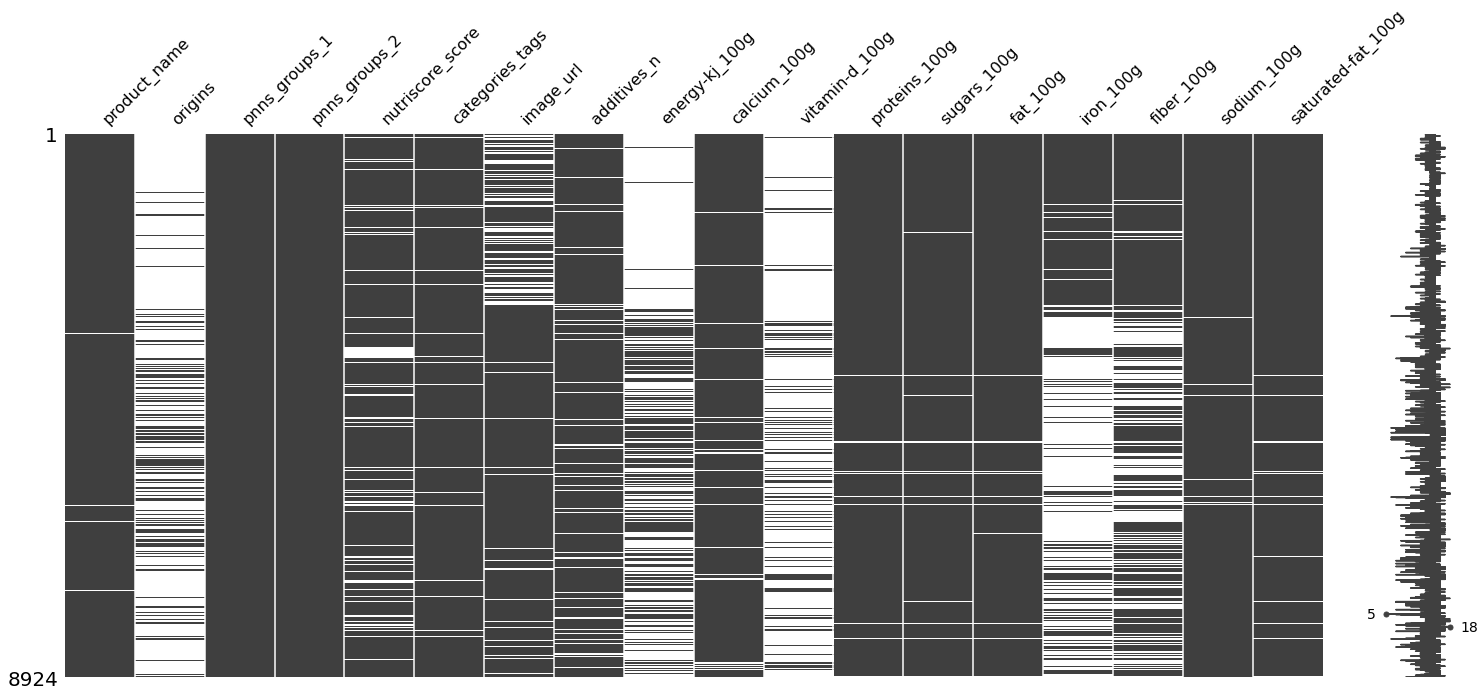

In [67]:
import seaborn as sns
import missingno as msno

msno.matrix(data_fr_final)


###### Nous traitons les valeurs manquantes par un algoritme KNN

Nous remplissons les valeurs de composition (le _100g), à l'exception des variables de calcium et de vitamine D.  
En effet nous voulons garder uniquement les valeurs exactes pour notre application.

In [144]:
# Les colonnes à garder sont les suivantes : 

col_knn =  ["proteins_100g",\
            "sugars_100g",\
            "fat_100g",\
            "iron_100g",\
            "fiber_100g",\
            "sodium_100g",\
            "energy-kj_100g",\
            "saturated-fat_100g"]

In [145]:
from sklearn.impute import KNNImputer
from numpy import isnan

# split into input and output elements
data_fr_comp = data_fr_final[col_knn].values
imputer = KNNImputer()
# fit on the dataset
imputer.fit(data_fr_comp)
# transform the dataset
#data_fr_final[col_knn].values = imputer.transform(data_fr_comp)
X = imputer.transform(data_fr_comp)
X = pd.DataFrame(X)
X.columns = col_knn


In [146]:
X

,proteins_100g,sugars_100g,fat_100g,iron_100g,fiber_100g,sodium_100g,energy-kj_100g,saturated-fat_100g
0,6.200000,32.300000,28.600000,0.003270,7.300000,0.520000,1401.200000,18.300000
1,21.000000,3.000000,48.000000,0.002250,9.400000,0.000000,1355.600000,7.500000
2,25.000000,6.250000,50.000000,0.002250,9.400000,0.000000,1356.800000,7.812500
3,0.000000,0.000000,0.000000,0.006720,2.000000,9.167000,392.600000,0.000000
4,4.100000,0.820000,1.640000,0.001180,0.800000,0.492000,170.600000,0.000000
...,...,...,...,...,...,...,...,...
8919,1.700000,7.500000,1.700000,0.001700,1.000000,0.012000,209.200000,0.900000
8920,14.290000,0.000000,23.210000,0.001290,0.000000,0.357000,1279.000000,5.360000
8921,2.170000,8.700000,13.040000,0.001570,4.300000,1.634744,664.800000,5.430000
8922,8.106398,13.510184,11.892129,0.024930,3.327439,0.355600,858.412619,4.897088


In [147]:
data_fr_final_knn = data_fr_final.copy()
data_fr_final_knn.reset_index(inplace = True)
for nom in col_knn :
    for i in range(len(data_fr_final_knn)):
        data_fr_final_knn.loc[i,nom] = X[nom].iloc[i]
data_fr_final_knn.reset_index(inplace = True)
del data_fr_final_knn['index']

In [148]:
data_fr_final_knn

,product_name,origins,pnns_groups_1,pnns_groups_2,nutriscore_score,categories_tags,image_url,additives_n,energy-kj_100g,calcium_100g,vitamin-d_100g,proteins_100g,sugars_100g,fat_100g,iron_100g,fiber_100g,sodium_100g,saturated-fat_100g
0,Moelleux au chocolat,NaN,unknown,unknown,NaN,NaN,https://images.openfoodfacts.org/images/produc...,0.0,1401.200000,0.036,NaN,6.200000,32.300000,28.600000,0.003270,7.300000,0.520000,18.300000
1,Peanut Butter,NaN,Cereals and potatoes,Legumes,-1.0,"en:plant-based-foods-and-beverages,en:plant-ba...",https://images.openfoodfacts.org/images/produc...,0.0,1355.600000,0.062,NaN,21.000000,3.000000,48.000000,0.002250,9.400000,0.000000,7.500000
2,Peanut Butter,NaN,Cereals and potatoes,Legumes,0.0,"en:plant-based-foods-and-beverages,en:plant-ba...",https://images.openfoodfacts.org/images/produc...,0.0,1356.800000,0.062,NaN,25.000000,6.250000,50.000000,0.002250,9.400000,0.000000,7.812500
3,"Traders Joe's, Baking Powder",NaN,unknown,unknown,10.0,en:cooking-helpers,https://images.openfoodfacts.org/images/produc...,2.0,392.600000,6.667,NaN,0.000000,0.000000,0.000000,0.006720,2.000000,9.167000,0.000000
4,"Pilgrim joe's, clam chowder a condensed soup",NaN,Composite foods,One-dish meals,3.0,"en:canned-foods,en:meals,en:soups,en:canned-me...",https://images.openfoodfacts.org/images/produc...,1.0,170.600000,0.000,NaN,4.100000,0.820000,1.640000,0.001180,0.800000,0.492000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,Milo Nestle,NaN,unknown,unknown,-1.0,"fr:boissons-chocolatee,fr:boissons-maltee,fr:b...",https://images.openfoodfacts.org/images/produc...,4.0,209.200000,0.120,NaN,1.700000,7.500000,1.700000,0.001700,1.000000,0.012000,0.900000
8920,"Ayam brand, sardines in extra virgin olive oil",NaN,Fish Meat Eggs,Fish and seafood,11.0,"en:canned-foods,en:seafood,en:fishes,en:sardines",https://images.openfoodfacts.org/images/produc...,0.0,1279.000000,0.179,NaN,14.290000,0.000000,23.210000,0.001290,0.000000,0.357000,5.360000
8921,"Curry Paste For Beef Rendang, Medium",Malaisie,Fat and sauces,Dressings and sauces,14.0,"en:groceries,en:sauces,en:curry-pastes",https://images.openfoodfacts.org/images/produc...,0.0,664.800000,0.043,NaN,2.170000,8.700000,13.040000,0.001570,4.300000,1.634744,5.430000
8922,Eau minérale naturelle,"France,Evian",Beverages,Waters and flavored waters,0.0,"en:beverages,en:waters,en:spring-waters,en:min...",https://images.openfoodfacts.org/images/produc...,0.0,858.412619,0.080,NaN,8.106398,13.510184,11.892129,0.024930,3.327439,0.355600,4.897088


Vérifions que l'imputation a bien fonctionné

<AxesSubplot:>

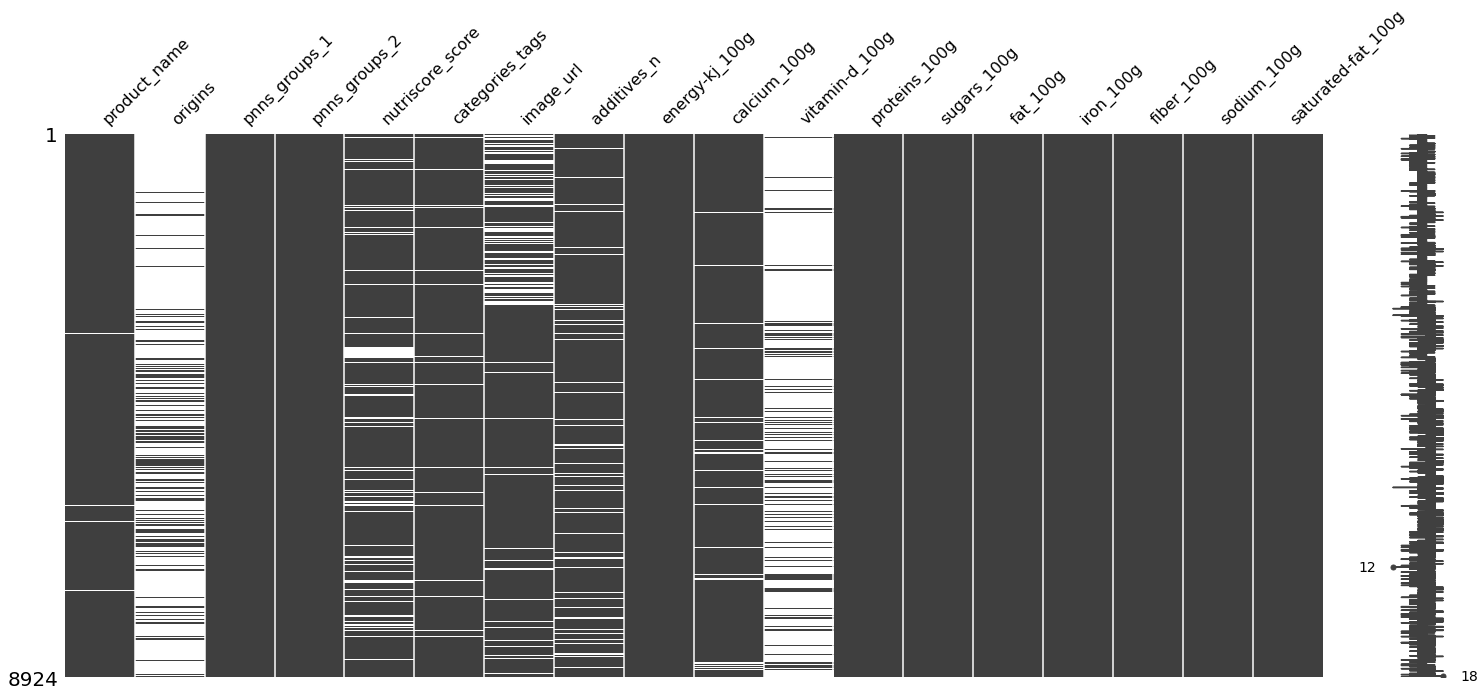

In [149]:
msno.matrix(data_fr_final_knn)

### Chapitre 3 Traiter les valeurs dupliquées et abérentes<a class="anchor" id="chapter3"></a>

In [150]:
data_fr_final_knn = data_fr_final_knn.drop_duplicates()

In [151]:
lignes_avant_traitement = len(data_fr_final_knn)
lignes_avant_traitement

8918

In [152]:
columns = list(data_fr_final_knn.columns)
col_knn =  ["proteins_100g",\
            "sugars_100g",\
            "fat_100g",\
            "iron_100g",\
            "fiber_100g",\
            "sodium_100g",\
            "saturated-fat_100g"]
for column in col_knn:
        data_fr_final_knn = data_fr_final_knn[(data_fr_final_knn[column] <= 100.) & (data_fr_final_knn[column] >= 0.)]


In [153]:
data_fr_final_knn = data_fr_final_knn[(data_fr_final_knn['calcium_100g'] <= 100.) & (data_fr_final_knn['calcium_100g'] >= 0.)]

In [154]:
lignes_apres_traitement = len(data_fr_final_knn)
lignes_apres_traitement

8431

In [155]:
data_fr_final_knn.describe()

,nutriscore_score,additives_n,energy-kj_100g,calcium_100g,vitamin-d_100g,proteins_100g,sugars_100g,fat_100g,iron_100g,fiber_100g,sodium_100g,saturated-fat_100g
count,7396.000000,7832.000000,8431.000000,8431.000000,1.284000e+03,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000
mean,7.154543,1.634831,749.478463,0.352513,8.244901e-02,8.167984,13.530490,10.724942,0.011242,2.673713,0.360759,4.727572
std,8.283306,2.368967,602.727822,3.412182,2.791397e+00,9.244507,17.020171,13.630614,0.238532,4.997024,1.707398,6.860917
min,-11.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,242.400000,0.032000,7.500000e-07,3.000000,2.715000,1.500000,0.000290,0.000000,0.040000,0.300000
50%,4.000000,1.000000,471.000000,0.120000,1.250000e-06,4.500000,6.670000,3.520000,0.001250,0.500000,0.065000,1.698000
75%,14.000000,2.000000,1276.200000,0.183000,3.007500e-06,10.000000,16.500000,18.500000,0.003600,3.600000,0.372307,6.250000
max,32.000000,17.000000,3450.000000,100.000000,1.000000e+02,87.200000,100.000000,100.000000,12.290000,90.000000,56.000000,95.000000


In [161]:
data_fr_final_knn.reset_index(inplace = True)
del data_fr_final_knn['index']

## Remplissage des valeurs manquantes nutriscore 

Le nutriscore permet d'avoir un bon apperçu de la qualité nutritionnelle d'un produit :

![Infographie-calcul-nutriscore-logo-nutritionnel-score-corrigé-scaled.jpg](Infographie-calcul-nutriscore-logo-nutritionnel-score-corrigé-scaled.jpg)

Nous allons donc calculer les nutriscores manquants avec quelques simplifications sur le pourcentage de fruit et légume qui ne sont pas à disposition : Si pnns_groups_2 = Fruit ou légume nous donnons un score P de 4.

In [162]:


def calul_point_limite(nutri,valeur):
    result = 10
    for i in range(len(nutri)):
        if valeur < nutri[i]:
            result = i
            break
    return result

def calul_point_fuit(nutri,valeur):
    result = 0
    for i in range(len(nutri)):
        j = len(nutri) - i -1
        if valeur > nutri[j]:
            result = j + 1
            break
    return result

def calcul_nutri(kj,sucre,fat,sel,fibre,prot, pnns_groups_1 ):
    kj_nutri = [(i+1)*335 for i in range(10)]
    sucre_nutri = [(i+1)*1.5 for i in range(10)]
    fatsat_nutri = [(i+1) for i in range(10)]
    sel_nutri = [(i+1)*90 for i in range(10)]
    fibre_nutri = [(i+1)*0.7 for i in range(5)]
    prot_nutri = [(i+1)*1.6 for i in range(5)]
    
    score_N = 0
    score_P = 0
    #aliments à limiter
    score_N += calul_point_limite(kj_nutri,kj)
    score_N += calul_point_limite(sucre_nutri,sucre)
    score_N += calul_point_limite(fatsat_nutri,fat)
    score_N += calul_point_limite(sel_nutri,sel)
    
    score_P += calul_point_fuit(fibre_nutri,fibre)
    score_P += calul_point_fuit(prot_nutri,prot)
    
    if pnns_groups_1 == 'Fruits and vegetables':
        score_P += 5
    if pnns_groups_1 == 'Beverages':
        score_N += 3
    
    return score_N - score_P

In [164]:
nutri_full = data_fr_final_knn['nutriscore_score']

for i in range(len(nutri_full)):
    if np.isnan(nutri_full[i]):
        kj = data_fr_final_knn["energy-kj_100g"][i]
        sucre = data_fr_final_knn['sugars_100g'][i]
        fat = data_fr_final_knn['saturated-fat_100g'][i]
        sel = data_fr_final_knn['sodium_100g'][i]
        fibre = data_fr_final_knn['fiber_100g'][i]
        prot = data_fr_final_knn['proteins_100g'][i]
        pnns_groups_1 = data_fr_final_knn['pnns_groups_1'][i]
        
        nutri_full[i] = calcul_nutri(kj,sucre,fat,sel,fibre,prot, pnns_groups_1)

In [165]:
data_fr_final_knn['nutriscore_score'] = nutri_full

In [168]:
sum(data_fr_final_knn['nutriscore_score'].isnull())

0

In [171]:
np.isnan(data_fr_final_knn['nutriscore_score'][0])

False

In [172]:
data_fr_final_knn['pnns_groups_1'].unique()

array(['unknown', 'Cereals and potatoes', 'Composite foods',
       'Fat and sauces', 'Beverages', 'Sugary snacks',
       'Milk and dairy products', 'Fish Meat Eggs', 'Salty snacks',
       'Fruits and vegetables', 'Alcoholic beverages'], dtype=object)

In [173]:
data_fr_final_knn['pnns_groups_2'].unique()

array(['unknown', 'Legumes', 'One-dish meals', 'Dressings and sauces',
       'Sweetened beverages', 'Artificially sweetened beverages',
       'Unsweetened beverages', 'Biscuits and cakes',
       'Chocolate products', 'Sweets', 'Fats', 'Bread', 'Cheese',
       'Milk and yogurt', 'Fish and seafood', 'Cereals', 'Processed meat',
       'Appetizers', 'Nuts', 'Fruits', 'Dried fruits',
       'Breakfast cereals', 'Plant-based milk substitutes',
       'Fruit juices', 'Meat', 'Pizza pies and quiches', 'Vegetables',
       'Eggs', 'Waters and flavored waters', 'Dairy desserts', 'Pastries',
       'Soups', 'Ice cream', 'Salty and fatty products', 'Potatoes',
       'Fruit nectars', 'Alcoholic beverages', 'Sandwiches',
       'Teas and herbal teas and coffees'], dtype=object)

# Sauvegarder le jeu de donné 

In [178]:
data_fr_final_knn.to_csv('data_fr_calcium8.csv', sep = ';')

In [179]:
data_fr_final_knn.describe(exclude=[np.number])

,product_name,origins,pnns_groups_1,pnns_groups_2,categories_tags,image_url
count,8369,2081,8431,8431,8123,7140
unique,7407,573,11,39,2730,7140
top,Yaourt à boire sucré aromatisé,France,Milk and dairy products,Milk and yogurt,en:snacks,https://images.openfoodfacts.org/images/produc...
freq,41,923,2825,1585,318,1
